In [2]:
%load_ext autoreload
%autoreload 2

In [14]:
import numpy as np
import pygsti
import pygsti.baseobjs.label as _lbl
import pygsti.modelmembers as mm
from pygsti.circuits import Circuit as _cir
import pygsti.algorithms.randomcircuit as _rc
from pygsti.tools import symplectic as _symp
import itertools
from pygsti.processors import CliffordCompilationRules as CCR

from mcmrc import *

from matplotlib import pyplot as plt
from scipy.optimize import curve_fit

In [15]:
ds = pygsti.io.read_dataset('05_26_2q_mcmcb_ibm_torino/05_26_2q_mcmcb_ibm_torino/data/dataset.txt')

Reading 05_26_2q_mcmcb_ibm_torino/05_26_2q_mcmcb_ibm_torino/data/dataset.txt: 100%


In [16]:
decay_form = lambda x, A, b: A*(b**x)

In [17]:
import pickle
with open('experiment_dict_ibm_torino_05_26.pkl', 'rb') as f:
    exp_dict = pickle.load(f)

In [18]:
all_experiment_cs = exp_dict['cs']
all_experiment_tbss = exp_dict['tbs']
all_experiment_signs = exp_dict['signs']

In [144]:
qubit_labels = ('Q13','Q14')
n = len(qubit_labels)
depths = [0,2,4,8,16]
both_depths = [0,1,2,4,8,16]

availability = {'Gcphase':[('Q13','Q14')]}
gate_names = [f'Gc{i}' for i in range(24)]+['Gcphase']
pspec = pygsti.processors.QubitProcessorSpec(n, gate_names, availability=availability, qubit_labels=qubit_labels) 
model = pygsti.models.create_crosstalk_free_model(pspec)

In [20]:
mcm_cphase_required_paulis = [('I','X'),('I','Y'),('Z','X'),('Z','Y')]
cphase_required_paulis = [('X','Y'),('Y','Y'),('Y','X'),('Z','Z'),('Z','X'),('Z','Y'),('Y','Z'),('X','X'),('X','Z')]

In [155]:
cs_by_pauli[('X','Y')][-1][0]

Circuit([Gc8:Q14Gc0:Q13][Gc12:Q13Gc9:Q14]Gcphase:Q13:Q14[Gc9:Q13Gc3:Q14]Gcphase:Q13:Q14[Gc3:Q13Gc6:Q14]Gcphase:Q13:Q14[Gc0:Q13Gc6:Q14]Gcphase:Q13:Q14[Gc0:Q13Gc9:Q14]Gcphase:Q13:Q14[Gc9:Q13Gc3:Q14]Gcphase:Q13:Q14[Gc0:Q13Gc6:Q14]Gcphase:Q13:Q14[Gc6:Q13Gc0:Q14]Gcphase:Q13:Q14[Gc3:Q13Gc9:Q14]Gcphase:Q13:Q14[Gc6:Q13Gc0:Q14]Gcphase:Q13:Q14[Gc0:Q13Gc6:Q14]Gcphase:Q13:Q14[Gc9:Q13Gc9:Q14]Gcphase:Q13:Q14[Gc3:Q13Gc6:Q14]Gcphase:Q13:Q14[Gc9:Q13Gc6:Q14]Gcphase:Q13:Q14[Gc9:Q13Gc6:Q14]Gcphase:Q13:Q14[Gc0:Q13Gc0:Q14]Gcphase:Q13:Q14[Gc3:Q13Gc3:Q14][Gc4:Q14Gc9:Q13][Gc21:Q13Gc3:Q14]@(Q13,Q14))

In [202]:
all_experiment_cs['both 1'][('I','Y')][1]

[Circuit([Gc8:Q14Gc3:Q13][Gc23:Q13Gc0:Q14]Gcphase:Q13:Q14[Gc6:Q13Gc0:Q14][Iz:Q13Gc0:Q14][Gc0:Q13Gc9:Q14][Gc10:Q14Gc3:Q13][Gc22:Q13Gc3:Q14]@(Q13,Q14)),
 Circuit([Gc2:Q14Gc6:Q13][Gc12:Q13Gc6:Q14]Gcphase:Q13:Q14[Gc0:Q13Gc3:Q14][Iz:Q13Gc0:Q14][Gc0:Q13Gc6:Q14][Gc4:Q14Gc0:Q13][Gc13:Q13Gc9:Q14]@(Q13,Q14)),
 Circuit([Gc11:Q14Gc9:Q13][Gc14:Q13Gc6:Q14]Gcphase:Q13:Q14[Gc3:Q13Gc3:Q14][Iz:Q13Gc0:Q14][Gc0:Q13Gc6:Q14][Gc7:Q14Gc0:Q13][Gc20:Q13Gc0:Q14]@(Q13,Q14)),
 Circuit([Gc2:Q14Gc6:Q13][Gc23:Q13Gc6:Q14]Gcphase:Q13:Q14[Gc9:Q13Gc9:Q14][Iz:Q13Gc0:Q14][Gc3:Q13Gc6:Q14][Gc7:Q14Gc3:Q13][Gc8:Q13Gc0:Q14]@(Q13,Q14)),
 Circuit([Gc5:Q14Gc0:Q13][Gc5:Q13Gc6:Q14]Gcphase:Q13:Q14[Gc6:Q13Gc3:Q14][Iz:Q13Gc0:Q14][Gc3:Q13Gc0:Q14][Gc1:Q14Gc0:Q13][Gc13:Q13Gc3:Q14]@(Q13,Q14)),
 Circuit([Gc11:Q14Gc3:Q13][Gc16:Q13Gc0:Q14]Gcphase:Q13:Q14[Gc6:Q13Gc3:Q14][Iz:Q13Gc0:Q14][Gc6:Q13Gc3:Q14][Gc4:Q14Gc6:Q13][Gc19:Q13Gc9:Q14]@(Q13,Q14)),
 Circuit([Gc5:Q14Gc9:Q13]Gcphase:Q13:Q14[Gc9:Q13Gc9:Q14][Iz:Q13Gc0:Q14][Gc0:Q13Gc3:Q14][Gc7:Q14Gc6:

In [188]:
all_experiment_cs['mcm'][('Z','Y')][3]

[Circuit([Gc8:Q14Gc9:Q13][Iz:Q13Gc0:Q14][Gc9:Q13Gc0:Q14][Iz:Q13Gc0:Q14][Gc3:Q13Gc6:Q14][Iz:Q13Gc0:Q14][Gc0:Q13Gc9:Q14][Iz:Q13Gc0:Q14][Gc3:Q13Gc0:Q14][Iz:Q13Gc0:Q14][Gc0:Q13Gc3:Q14][Iz:Q13Gc0:Q14][Gc6:Q13Gc9:Q14][Iz:Q13Gc0:Q14][Gc6:Q13Gc9:Q14][Iz:Q13Gc0:Q14][Gc0:Q13Gc9:Q14][Gc1:Q14Gc9:Q13]@(Q13,Q14)),
 Circuit([Gc8:Q14Gc0:Q13][Iz:Q13Gc0:Q14][Gc6:Q13Gc0:Q14][Iz:Q13Gc0:Q14][Gc0:Q13Gc3:Q14][Iz:Q13Gc0:Q14][Gc0:Q13Gc0:Q14][Iz:Q13Gc0:Q14][Gc9:Q13Gc3:Q14][Iz:Q13Gc0:Q14][Gc6:Q13Gc3:Q14][Iz:Q13Gc0:Q14][Gc0:Q13Gc3:Q14][Iz:Q13Gc0:Q14][Gc9:Q13Gc6:Q14][Iz:Q13Gc0:Q14][Gc6:Q13Gc3:Q14][Gc10:Q14Gc0:Q13]@(Q13,Q14)),
 Circuit([Gc5:Q14Gc6:Q13][Gc3:Q13Gc6:Q14][Iz:Q13Gc0:Q14][Gc3:Q13Gc6:Q14][Iz:Q13Gc0:Q14][Gc3:Q13Gc9:Q14][Iz:Q13Gc0:Q14][Gc3:Q13Gc0:Q14][Iz:Q13Gc0:Q14][Gc3:Q13Gc9:Q14][Iz:Q13Gc0:Q14][Gc9:Q13Gc9:Q14][Iz:Q13Gc0:Q14][Gc0:Q13Gc0:Q14][Iz:Q13Gc0:Q14][Gc9:Q13Gc3:Q14][Iz:Q13Gc0:Q14][Gc6:Q13Gc0:Q14][Gc7:Q14Gc0:Q13]@(Q13,Q14)),
 Circuit([Gc8:Q14Gc0:Q13][Gc9:Q13Gc6:Q14][Iz:Q13Gc0:Q14][Gc6:Q13Gc0:Q14][Iz:Q

In [189]:
exp = 'cphase' #'2 mcms', '2 mcms v2'
cs_by_pauli = all_experiment_cs[exp]
tbs_by_pauli = all_experiment_tbss[exp]
signs_by_pauli = all_experiment_signs[exp]
meas_qubits = []#['Q13'] #,'Q27']
num_meas = len(meas_qubits)
num_unmeas = 2-num_meas

#iterate through the experiments
circuit_energies_by_pauli = {}
circuit_alt_energies_by_pauli = {}
energies_by_pauli = {}
missing = 0
for p in cs_by_pauli.keys():
    clists = cs_by_pauli[p]
    tbslists = tbs_by_pauli[p]
    signlists = signs_by_pauli[p]
    circuit_energies_by_pauli[p] = []
    circuit_alt_energies_by_pauli[p] = []
    meas_pauli = [q if q in ['I', 'Z'] else 'Z' for q in p]
    print(p, meas_pauli)
    avg_energies = []
    
    j = 0
    for cs, tbss, signs in zip(clists, tbslists, signlists):
        print(j)
        circuit_energies = []
        circuit_alt_energies = []
        #print(tbss)
        for c, tbs, sign in zip(cs, tbss, signs):
            if c in ds:
                counts = ds[c].counts
                cd = ignore_mcm_results(counts)
                new_sign, new_tbs = determine_new_sign(c, tbs, pspec, meas_pauli)
                #print(new_sign, new_tbs, tbs, sign)
                #print('TBS:'+tbs, tbs[-(num_meas+num_unmeas):])
                energy = avg_energy(cd, meas_pauli, new_sign,new_tbs[-(num_meas+num_unmeas):])
                #print(energy,new_tbs, new_sign, cd)
                #print(p, energy)
                circuit_energies.append(energy)
                #print(energy,tbs, sign, new_sign, counts)
                ps = model.probabilities(c)
                print(avg_energy(ps, meas_pauli, new_sign,new_tbs[-(num_meas+num_unmeas):]))

                #print(energy)
            else:
                missing += 1
        avg_energies.append(np.mean(circuit_energies))
        circuit_energies_by_pauli[p].append(circuit_energies)
        j += 1
    energies_by_pauli[p] = avg_energies

('X', 'Y') ['Z', 'Z']
0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
2
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
3
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
4
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
('Y', 'Y') ['Z', 'Z']
0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
2
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0


In [197]:
?curve_fit

('X', 'Y')
[0.90807564 0.94640759] 0.008800188612905374


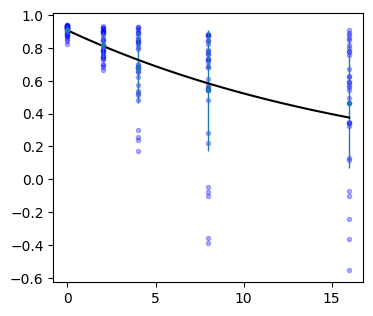

('Y', 'Y')
[0.91033547 0.96396334] 0.012599744031121674


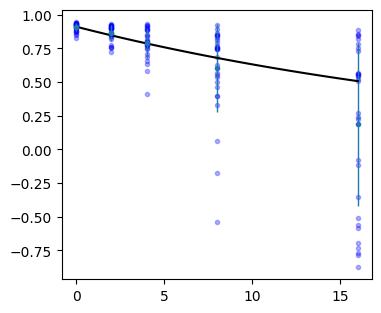

('Y', 'X')
[0.90018815 0.95839105] 0.011378831664799848


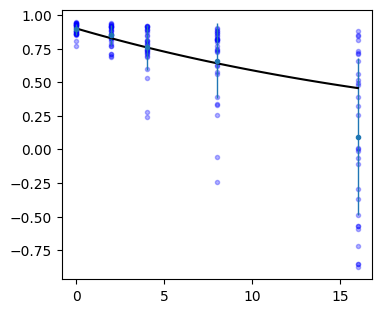

('Z', 'Z')
[0.91911829 0.99567818] 0.0004743617208532033


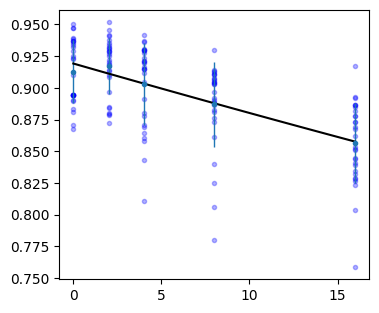

('Z', 'X')
[0.90925709 0.95675789] 0.010642569881873986


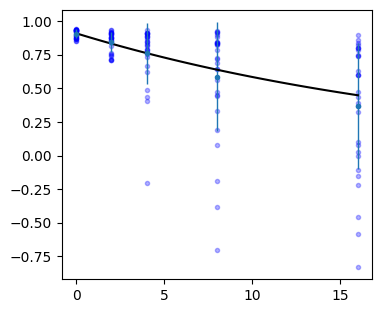

('Z', 'Y')
[0.9054242  0.95865439] 0.009912559091505553


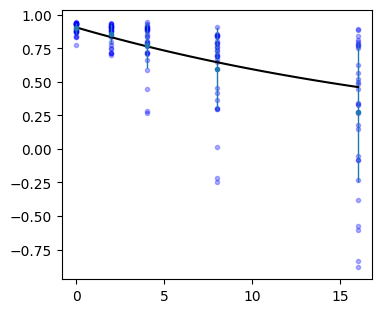

('Y', 'Z')
[0.91034346 0.99669665] 0.000436535872825152


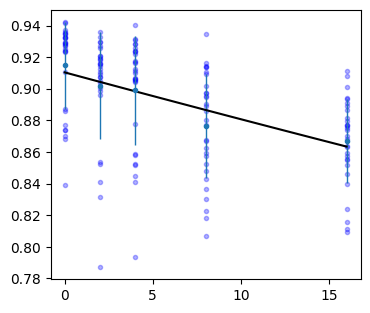

('X', 'X')
[0.91058922 0.95781099] 0.012911686595876225


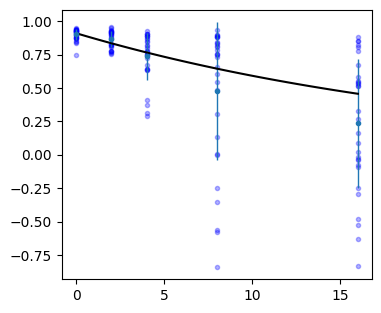

('X', 'Z')
[0.91229844 0.99562456] 0.0006344076351210529


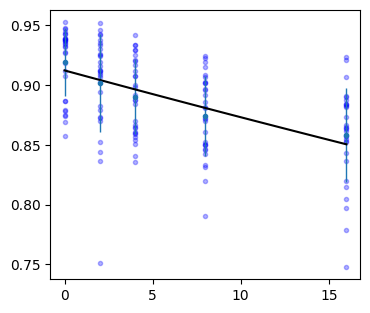

In [199]:
eigs_cz = {}
eigs_cz_std = {}
for p, energy_lists in circuit_energies_by_pauli.items():
    print(p)
    means = [np.mean(l) for l in energy_lists]
    errs = [np.std(l) for l in energy_lists]
    res = curve_fit(decay_form, depths, means, sigma=errs, p0=[1,0.99])[0]

    std = bootstrap_error(energy_lists, depths, bootstrap_samples=100, n_shots=5000)
    eigs_cz[(p,False)] = res[1]
    eigs_cz_std[(p,False)] = std
    print(res, std)
    xs = np.linspace(0,16, 100)
    f = [decay_form(x, *res) for x in xs]
    plt.figure(figsize=(4,3.5))
    plt.errorbar(depths, means, linewidth=0, elinewidth=1, marker='.', yerr=[np.std(l) for l in energy_lists])
    plt.plot(xs, f, color='black')
    for d, elist in zip(depths, energy_lists):
        plt.scatter([d for _ in elist], elist, alpha=0.3, color='blue', marker='.')
    plt.show()

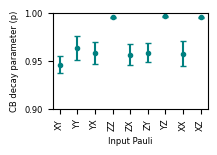

In [200]:
plt.figure(figsize=(2,1.25))
xlabels = []
for i, p in enumerate(cphase_required_paulis):
    xlabels.append(''.join(p))
    #construct the keys we'll plot at this xvalue
    plt.errorbar(i, eigs_cz[(p, False)], color='teal', marker='.', yerr=eigs_cz_std[(p, False)], capsize=2)
plt.xticks(range(len(xlabels)), xlabels, rotation=90,fontsize=6)
plt.yticks(fontsize=6)
plt.ylim(0.9, 1)
plt.ylabel('CB decay parameter (p)', fontsize=6)
plt.xlabel(r'''Input Pauli''', fontsize=6)
plt.savefig('cz_mcm_plots/ibm_torino_05_26_cphase_single_plot_errorbars.pdf')
plt.show()

In [109]:
(1+2*(eigs_cz[(('Y', 'Z'), False)]+eigs_cz[(('X', 'Z'), False)]+eigs_cz[(('Z', 'X'), False)]+eigs_cz[(('Z', 'X'), False)]+eigs_cz[(('Y', 'Z'), False)])+eigs_cz[(('X', 'Y'), False)]+eigs_cz[(('Y', 'Y'), False)]+eigs_cz[(('Y', 'X'), False)]+eigs_cz[(('X', 'X'), False)]+eigs_cz[(('Z', 'Z'), False)])/16

0.967639052005818

In [111]:
np.sqrt(2*(eigs_cz_std[(('Y', 'Z'), False)]**2+eigs_cz_std[(('X', 'Z'), False)]**2+eigs_cz_std[(('Z', 'X'), False)]**2+eigs_cz_std[(('Z', 'X'), False)]**2+eigs_cz_std[(('Y', 'Z'), False)]**2)+eigs_cz_std[(('X', 'Y'), False)]**2+eigs_cz_std[(('Y', 'Y'), False)]**2+eigs_cz_std[(('Y', 'X'), False)]**2+eigs_cz_std[(('X', 'X'), False)]**2+eigs_cz_std[(('Z', 'Z'), False)]**2)/16

0.0019164163088520403

In [106]:
eigs_cz

{(('X', 'Y'), False): 0.9531756588675867,
 (('Y', 'Y'), False): 0.927824020639863,
 (('Y', 'X'), False): 0.9235140913515891,
 (('Z', 'Z'), False): 0.9956812379643863,
 (('Z', 'X'), False): 0.9453764280845389,
 (('Z', 'Y'), False): 0.9367909571082499,
 (('Y', 'Z'), False): 0.9966508945266792,
 (('X', 'X'), False): 0.9220868453062715,
 (('X', 'Z'), False): 0.9959168437592602}

In [79]:
exp = 'mcm' #'2 mcms', '2 mcms v2'
cs_by_pauli = all_experiment_cs[exp]
tbs_by_pauli = all_experiment_tbss[exp]
signs_by_pauli = all_experiment_signs[exp]
meas_qubits = ['Q13']#['Q13'] #,'Q27']
num_meas = len(meas_qubits)
num_unmeas = 2-num_meas
circuit_energies_by_pauli = {}
circuit_alt_energies_by_pauli = {}
for p in cs_by_pauli.keys():
    print(p)
    clists = cs_by_pauli[p]
    tbslists = tbs_by_pauli[p]
    signlists = signs_by_pauli[p]

    meas_pauli = ['I']+[q if q in ['I', 'Z'] else 'Z' for q in p][1:]
    avg_energies = []
    
    new_p = tuple(['I']+list(p[1:]))
    print(p, new_p)
    circuit_energies_by_pauli[new_p] = []
    circuit_alt_energies_by_pauli[new_p] = []
    
    for cs, tbss, signs in zip(clists, tbslists, signlists):
        circuit_energies = []
        circuit_alt_energies = []
        #print(tbss)
        for c, tbs, sign in zip(cs, tbss, signs):
            if c in ds:
                #determine_new_sign is broxen for multiple qubits. 
                new_sign, new_tbs = determine_new_sign(c, tbs, pspec, meas_pauli)
                counts = ds[c].counts
                cd = ignore_mcm_results(counts)
                #print(c, cd, model.probabilities(c),tbs, sign, meas_pauli)
                #print('TBS:'+tbs, tbs[-(num_meas+num_unmeas):])
                energy = avg_energy(cd, meas_pauli, new_sign,new_tbs[-(num_meas+num_unmeas):])
                #print(meas_pauli, energy)
                circuit_energies.append(energy)

                #toggle computation
                energy = avg_energy_sign_mod(counts, meas_pauli, new_sign, new_tbs, meas_qubits, meas_qubits)
                circuit_alt_energies.append(energy)
                #print(energy)

                
            else:
                missing += 1
        avg_energies.append(np.mean(circuit_energies))
        circuit_energies_by_pauli[new_p].append(circuit_energies)
        circuit_alt_energies_by_pauli[new_p].append(circuit_alt_energies)
    energies_by_pauli[new_p] = avg_energies


('Z', 'I')
('Z', 'I') ('I', 'I')
('Z', 'X')
('Z', 'X') ('I', 'X')
('Z', 'Y')
('Z', 'Y') ('I', 'Y')
('Z', 'Z')
('Z', 'Z') ('I', 'Z')


In [80]:
for p in cs_by_pauli.keys():
    print(p)
    clists = cs_by_pauli[p]
    tbslists = tbs_by_pauli[p]
    signlists = signs_by_pauli[p]

    meas_pauli = ['Z']+[q if q in ['I', 'Z'] else 'Z' for q in p][1:]
    avg_energies = []
    
    new_p = tuple(['Z']+list(p[1:]))
    print(p, new_p)
    circuit_energies_by_pauli[new_p] = []
    circuit_alt_energies_by_pauli[new_p] = []
    
    for cs, tbss, signs in zip(clists, tbslists, signlists):
        circuit_energies = []
        circuit_alt_energies = []
        #print(tbss)
        for c, tbs, sign in zip(cs, tbss, signs):
            if c in ds:
                #determine_new_sign is broxen for multiple qubits. 
                new_sign, new_tbs = determine_new_sign(c, tbs, pspec, meas_pauli)
                counts = ds[c].counts
                cd = ignore_mcm_results(counts)
                #print(c, cd, model.probabilities(c),tbs, sign, meas_pauli)
                #print('TBS:'+tbs, tbs[-(num_meas+num_unmeas):])
                energy = avg_energy(cd, meas_pauli, new_sign,new_tbs[-(num_meas+num_unmeas):])
                #print(meas_pauli, energy)
                circuit_energies.append(energy)

                #toggle computation
                energy = avg_energy_sign_mod(counts, meas_pauli, new_sign, new_tbs, meas_qubits, meas_qubits)
                circuit_alt_energies.append(energy)
                #print(energy)

                
            else:
                missing += 1
        avg_energies.append(np.mean(circuit_energies))
        circuit_energies_by_pauli[new_p].append(circuit_energies)
        circuit_alt_energies_by_pauli[new_p].append(circuit_alt_energies)
    energies_by_pauli[new_p] = avg_energies

('Z', 'I')
('Z', 'I') ('Z', 'I')
('Z', 'X')
('Z', 'X') ('Z', 'X')
('Z', 'Y')
('Z', 'Y') ('Z', 'Y')
('Z', 'Z')
('Z', 'Z') ('Z', 'Z')


('I', 'I')
[1. 1.] 0.0


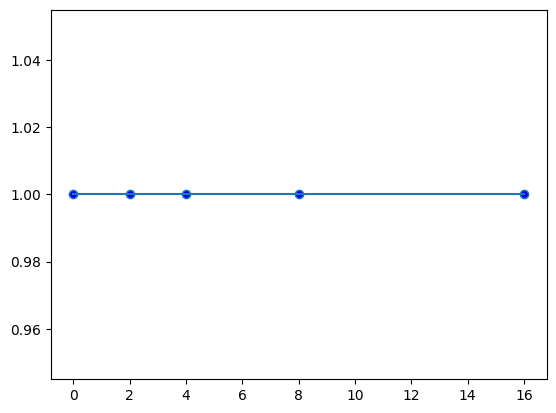

('I', 'X')
[0.94062888 0.98888264] 0.0007359316378225926


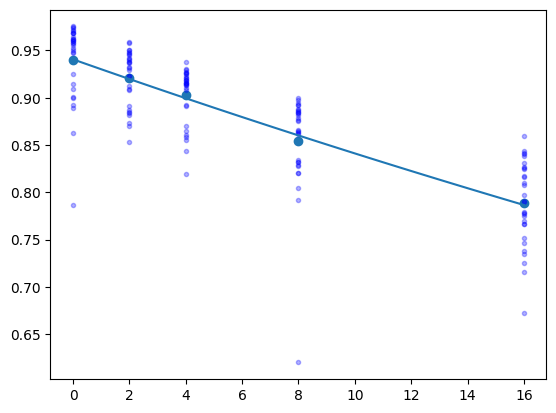

('I', 'Y')
[0.93115653 0.98861323] 0.0010934170120452749


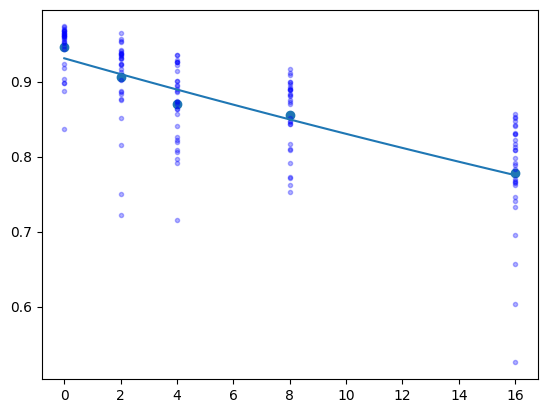

('I', 'Z')
[0.94467022 0.98277354] 0.0009665358203113634


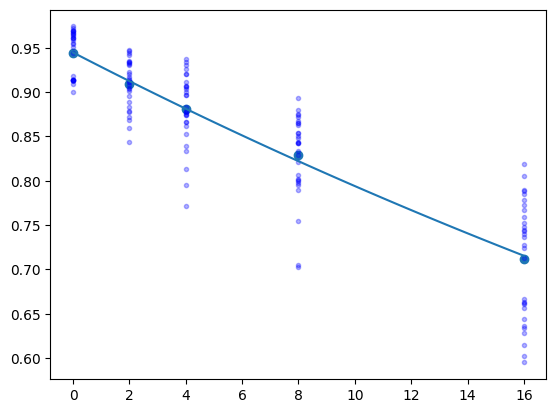

('Z', 'I')
[0.96621598 0.98159704] 0.0010534559326096258


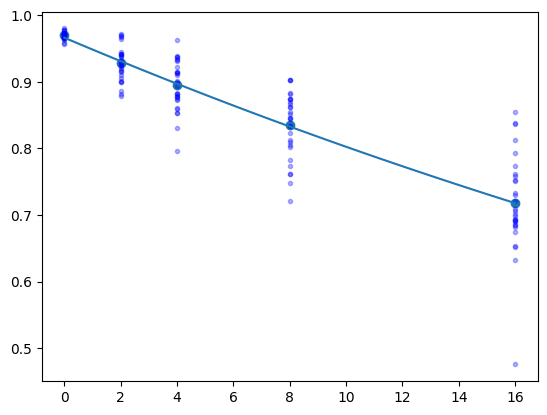

('Z', 'X')
[0.91150026 0.9700927 ] 0.0014614104374162957


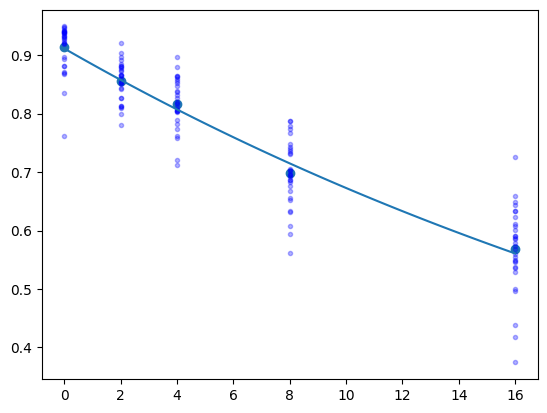

('Z', 'Y')
[0.90544035 0.96909671] 0.0012263685737789517


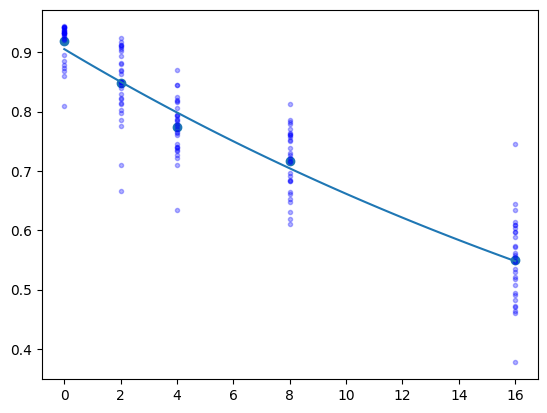

('Z', 'Z')
[0.91811222 0.96641621] 0.0015221905503647957


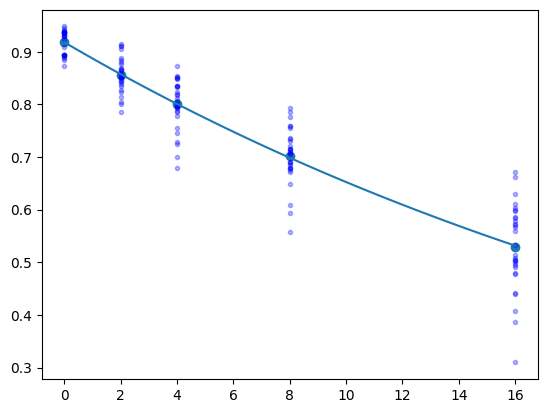

In [117]:
eigs_mcm = {}
eigs_mcm_std = {}
for p, energy_lists in circuit_energies_by_pauli.items():
    print(p)
    means = [np.mean(l) for l in energy_lists]
    res = curve_fit(decay_form, depths, means, p0=[1,0.99])[0]

    std = bootstrap_error(energy_lists, depths, bootstrap_samples=100, n_shots=5000)
    eigs_mcm[(p,False)] = res[1]
    eigs_mcm_std[(p,False)] = std
    print(res, std)
    xs = np.linspace(0,16, 100)
    f = [decay_form(x, *res) for x in xs]
    plt.scatter(depths, means)
    plt.plot(xs, f)
    for d, elist in zip(depths, energy_lists):
        plt.scatter([d for _ in elist], elist, alpha=0.3, color='blue', marker='.')
    plt.show()

('I', 'I')
[0.99248073 0.98879883] 0.0004612998326807286


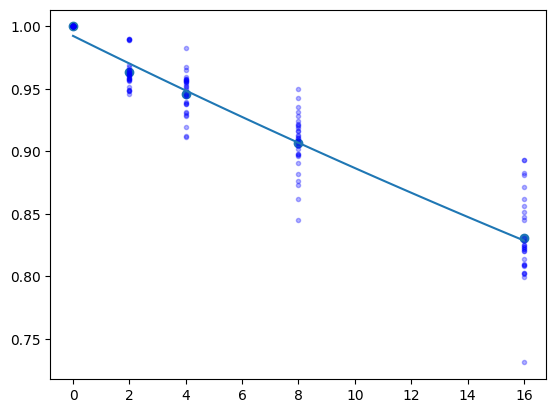

('I', 'X')
[0.93408426 0.97800931] 0.0008580391985782672


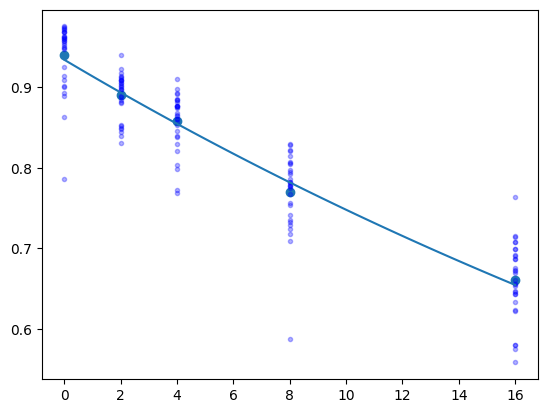

('I', 'Y')
[0.92688235 0.97700217] 0.0011832417855075722


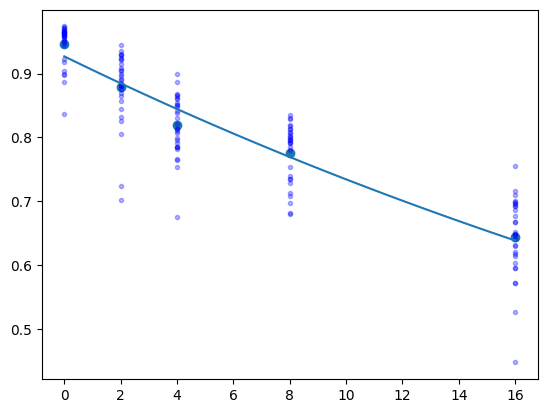

('I', 'Z')
[0.9393078  0.97281695] 0.0011124236794396885


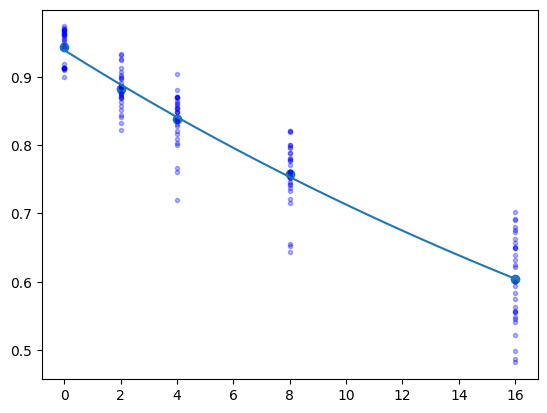

('Z', 'I')
[0.96786466 0.9895241 ] 0.000490640032434336


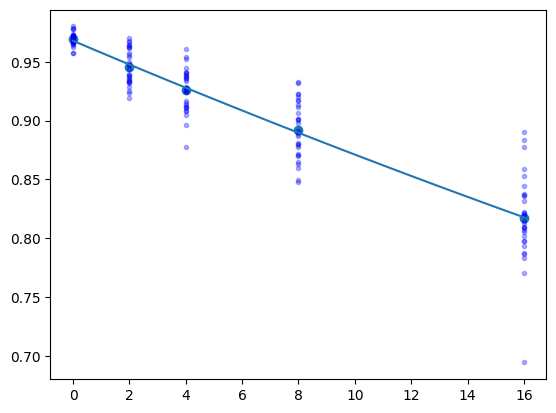

('Z', 'X')
[0.913703   0.97830309] 0.0007619852867536254


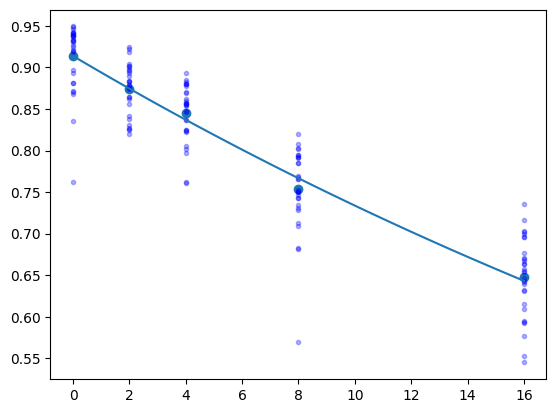

('Z', 'Y')
[0.90547522 0.97793904] 0.0013142966695081208


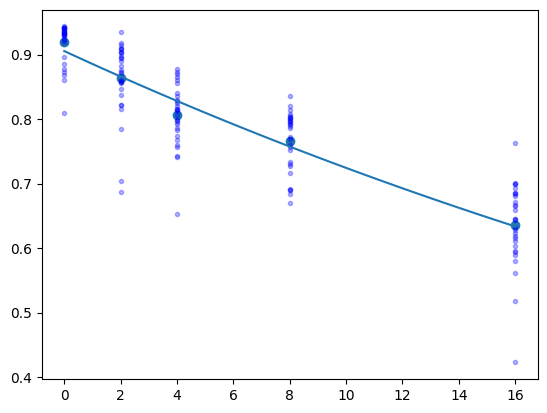

('Z', 'Z')
[0.91787275 0.97322775] 0.001131654364056937


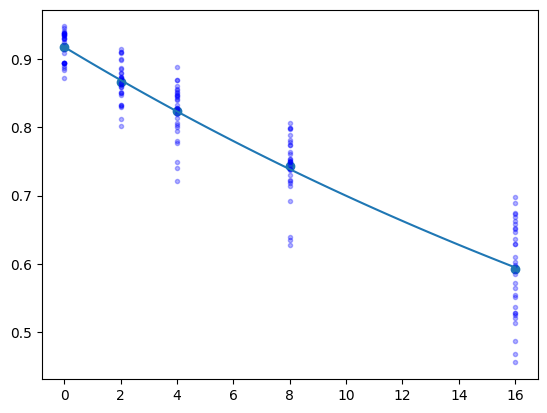

In [118]:
for p, energy_lists in circuit_alt_energies_by_pauli.items():
    print(p)
    means = [np.mean(l) for l in energy_lists]
    res = curve_fit(decay_form, depths, means, p0=[1,0.99])[0]
    eigs_mcm[(p,True)] = res[1]
    
    std = bootstrap_error(energy_lists, depths, bootstrap_samples=100, n_shots=5000)
    eigs_mcm_std[(p,True)] = std
    
    print(res, std)
    xs = np.linspace(0,16, 100)
    f = [decay_form(x, *res) for x in xs]
    plt.scatter(depths, means)
    plt.plot(xs, f)
    for d, elist in zip(depths, energy_lists):
        plt.scatter([d for _ in elist], elist, alpha=0.3, color='blue', marker='.')
    plt.show()

In [194]:
0.97*0.93

0.9021

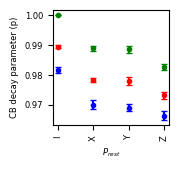

In [119]:
plt.figure(figsize=(1.5,1.5))
xlabels = []
for i, p in enumerate(cs_by_pauli.keys()):
    xlabels.append(''.join(p[1:]))
    #construct the keys we'll plot at this xvalue
    plt.errorbar(i, eigs_mcm[(('Z',)+p[1:], False)], color='blue', marker='.', yerr=eigs_mcm_std[(('Z',)+p[1:], False)], capsize=2)
    plt.errorbar(i, eigs_mcm[(('Z',)+p[1:], True)], color='red', marker='.', yerr=eigs_mcm_std[(('Z',)+p[1:], True)], capsize=2)
    plt.errorbar(i, eigs_mcm[(('I',)+p[1:], False)], color='green', marker='.', yerr=eigs_mcm_std[(('I',)+p[1:], False)], capsize=2)
    #plt.errorbar(i, eigs[(('I',)+p[1:], True)], color='purple', marker='.',yerr=eigs_std[(('I',)+p[1:], True)], capsize=2)
plt.xticks(range(len(xlabels)), xlabels, rotation=90, fontsize=6)
plt.yticks(fontsize=6)
plt.ylabel('CB decay parameter (p)', fontsize=6)
plt.xlabel(r'''$P_{rest}$''',fontsize=6)
plt.savefig('ibm_torino_05_26_all_values_single_plot_errorbars.pdf')
plt.show()

In [91]:
(np.sum(l1s)+np.sum(l2s)+2*np.sum(l3s))/16

0.9803412524552111

In [98]:
np.sqrt(sum(v**2 for v in eigs_std.values()))

0.004187562009124782

In [84]:
l2s = np.array(list(eigs_mcm[(('Z',)+p[1:], False)] for p in cs_by_pauli.keys()))
l1s = np.array(list(eigs_mcm[(('I',)+p[1:], False)] for p in cs_by_pauli.keys()))
l3s = np.array(list(eigs_mcm[(('Z',)+p[1:], True)] for p in cs_by_pauli.keys()))
l4s = np.array(list(eigs_mcm[(('I',)+p[1:], True)] for p in cs_by_pauli.keys()))

u2 = np.sqrt(np.sum(list(eigs_mcm_std[(('Z',)+p[1:], False)]**2 for p in cs_by_pauli.keys())))
u1 = np.sqrt(np.sum(list(eigs_mcm_std[(('I',)+p[1:], False)]**2 for p in cs_by_pauli.keys())))
u3 = np.sqrt(np.sum(list(eigs_mcm_std[(('Z',)+p[1:], True)]**2 for p in cs_by_pauli.keys())))
u4 = np.sqrt(np.sum(list(eigs_mcm_std[(('I',)+p[1:], True)]**2 for p in cs_by_pauli.keys())))

from scipy.linalg import hadamard
w = hadamard(4**1)

p1s = w@(l1s+l2s+l3s+l4s)/16
p2s = w@(l1s+l2s-2*l3s)/16
p3s = w@(l1s-l2s)/8
p4s = w@l4s/4

In [99]:
err1 = np.sqrt(u2**2+u1**2+2*u3**2)/4
err2 = np.sqrt(u2**2+u1**2+2*u3**2)/4
err3 = np.sqrt(u2**2+u1**2)/2

In [101]:
err1

0.0010560895196697305

3
7


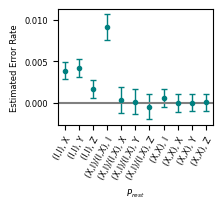

In [102]:
#try sorting by weight
plt.figure(figsize=(2,1.5))
xlabels = []
i = 0
largest_values = []
smallest_values = []
eigs_sorted = []
eig_sum_errs = []
for p in cs_by_pauli.keys():
    if not all([q == 'I' for q in p[1:]]):
        xlabels.append('(I,I), '+''.join(p[1:]))
        #construct the keys we'll plot at this xvalue
        eig_err = np.sqrt(np.sum(list(eigs_std[(('I',)+p[1:], False)]**2 for p in cs_by_pauli.keys())))/4
        plt.errorbar(i, p1s[i+1], color='teal', marker='.', yerr=err1, elinewidth=1, capsize=2)
        i += 1
print(i)
for p in cs_by_pauli.keys():
    xlabels.append('(X,I)/(I,X), '+''.join(p[1:]))
    #construct the keys we'll plot at this xvalue
    #eig_sum = 0.25*(-1*eigs[(('Z',)+p[1:], False)]+eigs[(('Z',)+p[1:], True)]+eigs[(('I',)+p[1:], False)]-eigs[(('I',)+p[1:], True)])
    eig_err = np.sqrt(np.sum(list(eigs_std[(('Z',)+p[1:], True)]**2 for p in cs_by_pauli.keys())))/4
    plt.errorbar(i, p3s[i-3], color='teal', marker='.', yerr=err3, elinewidth=1, capsize=2)
    i += 1
print(i)
for p in cs_by_pauli.keys():
    xlabels.append('(X,X), '+''.join(p[1:]))
    #construct the keys we'll plot at this xvalue
    eig_sum = 0.25*(-1*eigs[(('Z',)+p[1:], False)]+eigs[(('Z',)+p[1:], True)]+eigs[(('I',)+p[1:], False)]-eigs[(('I',)+p[1:], True)])
    eig_err = np.sqrt(np.sum(list(eigs_std[(('Z',)+p[1:], False)]**2 for p in cs_by_pauli.keys())))/4
    plt.errorbar(i, p2s[i-7], color='teal', marker='.', yerr=err2, elinewidth=1, capsize=2)
    i += 1

plt.xticks(range(len(xlabels)), xlabels, rotation=60, fontsize=6, ha='right', rotation_mode='anchor')
plt.axhline(0, color='gray')
plt.yticks(fontsize=6)
plt.ylabel(r'''Estimated Error Rate''', fontsize=6)
plt.xlabel(r'''$P_{rest}$''', fontsize=6)
plt.savefig('cz_mcm_plots/ibm_torino_05_26_Error_Rates.pdf')
plt.show()

In [57]:
p1s

array([0.98019333, 0.00387806, 0.00420763, 0.00170097])

In [59]:
p3s

array([ 0.00913334,  0.00034653,  0.00016488, -0.00044327])

IndexError: index 4 is out of bounds for axis 0 with size 4

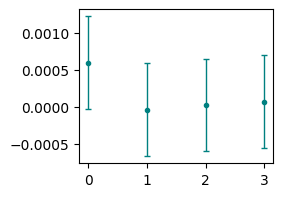

In [40]:
#try sorting by weight
plt.figure(figsize=(2.5,2))
xlabels = []
i = 0
largest_values = []
smallest_values = []
eigs_sorted = []
eig_sum_errs = []
for p in cs_by_pauli.keys():
    xlabels.append(''.join(p[1:]))
    #construct the keys we'll plot at this xvalue
    eig_sum = 0.25*(-1*eigs[(('Z',)+p[1:], False)]+eigs[(('Z',)+p[1:], True)]+eigs[(('I',)+p[1:], False)]-eigs[(('I',)+p[1:], True)])
    eig_err = np.sqrt(np.sum(list(eigs_std[(('Z',)+p[1:], False)]**2 for p in cs_by_pauli.keys())))/4
    plt.errorbar(i, p2s[i], color='teal', marker='.', yerr=eig_err, elinewidth=1, capsize=2)
    eigs_sorted.append(eig_sum)
    eig_sum_errs.append(eig_err)
    i += 1
for p in cs_by_pauli.keys():
    xlabels.append(''.join(p[1:]))
    #construct the keys we'll plot at this xvalue
    eig_sum = 0.25*(-1*eigs[(('Z',)+p[1:], False)]+eigs[(('Z',)+p[1:], True)]+eigs[(('I',)+p[1:], False)]-eigs[(('I',)+p[1:], True)])
    eig_err = np.sqrt(np.sum(list(eigs_std[(('Z',)+p[1:], True)]**2 for p in cs_by_pauli.keys())))/4
    plt.errorbar(i, p3s[i], color='teal', marker='.', yerr=eig_err, elinewidth=1, capsize=2)
    eigs_sorted.append(eig_sum)
    eig_sum_errs.append(eig_err)
    i += 1

plt.xticks(range(len(xlabels)), xlabels, rotation=90)
plt.axhline(0, color='gray')
#plt.yticks([0.75, 0.80, 0.85, 0.90, 0.95, 1])
plt.ylabel(r'''Estimated $Pr(P_{rest})_{0,0}$''')
plt.xlabel(r'''$P_{rest}$''')
#plt.savefig('ibm_osaka_05_19_T10')
plt.show()

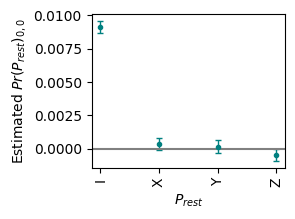

In [41]:
#try sorting by weight
plt.figure(figsize=(2.5,2))
xlabels = []
i = 0
largest_values = []
smallest_values = []
eigs_sorted = []
eig_sum_errs = []
for p in cs_by_pauli.keys():
    xlabels.append(''.join(p[1:]))
    #construct the keys we'll plot at this xvalue
    eig_sum = 0.25*(-1*eigs[(('Z',)+p[1:], False)]+eigs[(('Z',)+p[1:], True)]+eigs[(('I',)+p[1:], False)]-eigs[(('I',)+p[1:], True)])
    eig_err = np.sqrt(np.sum(list(eigs_std[(('Z',)+p[1:], True)]**2 for p in cs_by_pauli.keys())))/4
    plt.errorbar(i, p3s[i], color='teal', marker='.', yerr=eig_err, elinewidth=1, capsize=2)
    eigs_sorted.append(eig_sum)
    eig_sum_errs.append(eig_err)
    i += 1

plt.xticks(range(len(xlabels)), xlabels, rotation=90)
plt.axhline(0, color='gray')
#plt.yticks([0.75, 0.80, 0.85, 0.90, 0.95, 1])
plt.ylabel(r'''Estimated $Pr(P_{rest})_{0,0}$''')
plt.xlabel(r'''$P_{rest}$''')
#plt.savefig('ibm_osaka_05_19_T10')
plt.show()

In [128]:
meas_qubits = ['Q13'] #,'Q27']
num_meas = len(meas_qubits)
num_unmeas = 2-num_meas

#iterate through the experiments
circuit_energies_by_pauli = {}
circuit_alt_energies_by_pauli = {}
energies_by_pauli = {}
missing = 0
for j in range(3):
    exp = f'both {j}' #'2 mcms', '2 mcms v2'
    cs_by_pauli = all_experiment_cs[exp]
    tbs_by_pauli = all_experiment_tbss[exp]
    signs_by_pauli = all_experiment_signs[exp]
    for p in cs_by_pauli.keys():
        clists = cs_by_pauli[p]
        tbslists = tbs_by_pauli[p]
        signlists = signs_by_pauli[p]
        circuit_energies_by_pauli[(p,j)] = []
        circuit_alt_energies_by_pauli[(p,j)] = []
        meas_pauli = [q if q in ['I', 'Z'] else 'Z' for q in p]
        print(p)
        avg_energies = []
        
            
        for cs, tbss, signs in zip(clists, tbslists, signlists):
            circuit_energies = []
            circuit_alt_energies = []
            #print(tbss)
            for c, tbs, sign in zip(cs, tbss, signs):
                if c in ds:
                    counts = ds[c].counts
                    cd = ignore_mcm_results(counts)
                    new_sign, new_tbs = determine_new_sign(c, tbs, pspec, meas_pauli)
                    #print(new_sign, new_tbs, tbs, sign)
                    #print('TBS:'+tbs, tbs[-(num_meas+num_unmeas):])
                    energy = avg_energy(cd, meas_pauli, new_sign,new_tbs[-(num_meas+num_unmeas):])
                    #print(energy,new_tbs, new_sign, cd)
                    #print(p, energy)
                    circuit_energies.append(energy)
    
                    #toggle computation
                    energy = avg_energy_sign_mod(counts, meas_pauli, sign, tbs, meas_qubits, meas_qubits)
                    #print(energy) #,tbs, sign, counts)
                    circuit_alt_energies.append(energy)
                    #print(energy)
                else:
                    missing += 1
            avg_energies.append(np.mean(circuit_energies))
            circuit_energies_by_pauli[(p,j)].append(circuit_energies)
            circuit_alt_energies_by_pauli[(p,j)].append(circuit_alt_energies)
        energies_by_pauli[(p,j)] = avg_energies

('I', 'X')
('I', 'Y')
('Z', 'X')
('Z', 'Y')
('I', 'X')
('I', 'Y')
('Z', 'X')
('Z', 'Y')
('I', 'X')
('I', 'Y')
('Z', 'X')
('Z', 'Y')


In [125]:
both_depths

[0, 1, 2, 4, 8, 16]

('I', 'X') 0
[0.91413571 0.97096875] 0.0013057005461046386


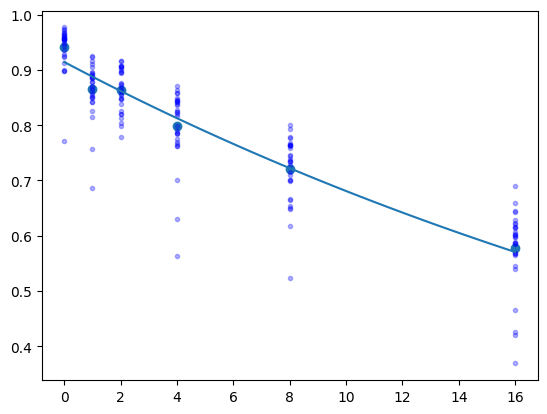

('I', 'Y') 0
[0.92522754 0.97330351] 0.001247221841681603


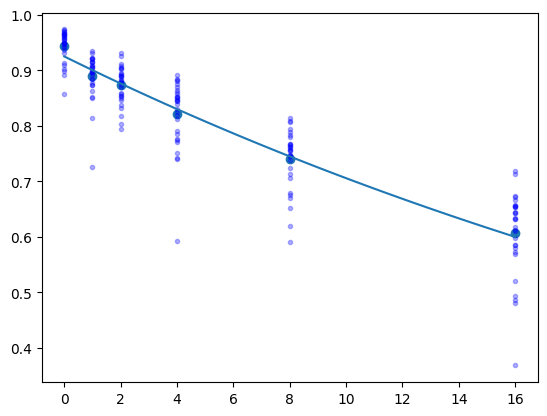

('Z', 'X') 0
[0.89840856 0.96713441] 0.0011770565768950032


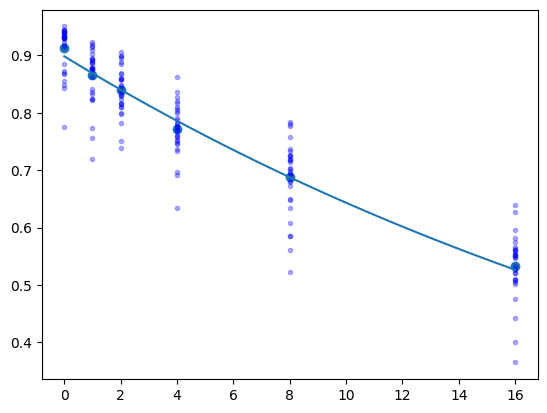

('Z', 'Y') 0
[0.90438032 0.97266909] 0.001209339352644602


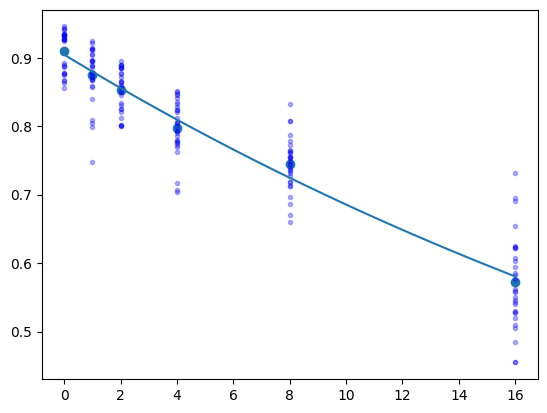

('I', 'X') 1
[0.91914358 0.97745252] 0.0007656068581323069


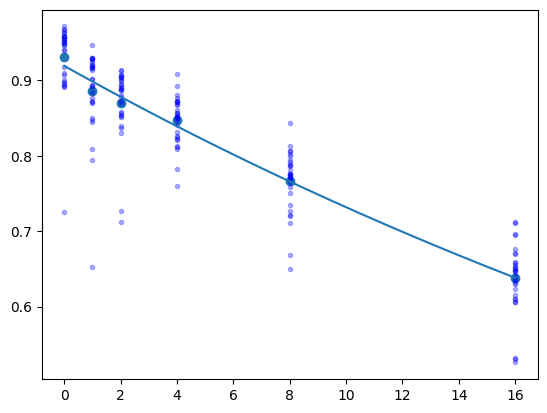

('I', 'Y') 1
[0.91183098 0.975925  ] 0.0011092113483765975


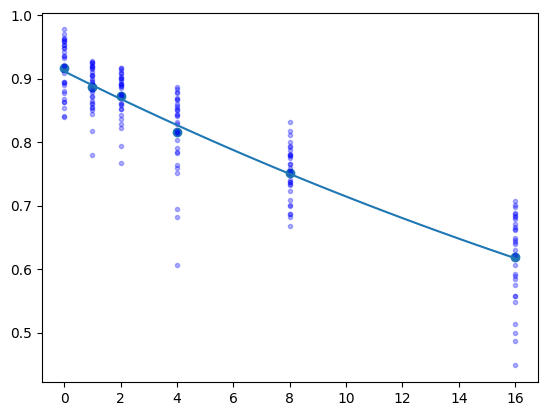

('Z', 'X') 1
[0.90435798 0.97441004] 0.0007188312780574372


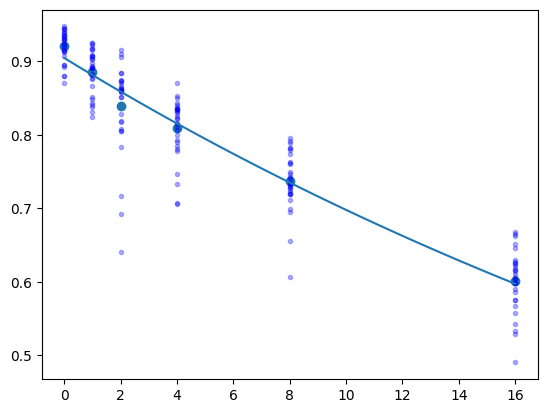

('Z', 'Y') 1
[0.89865581 0.97157859] 0.0013209636902399289


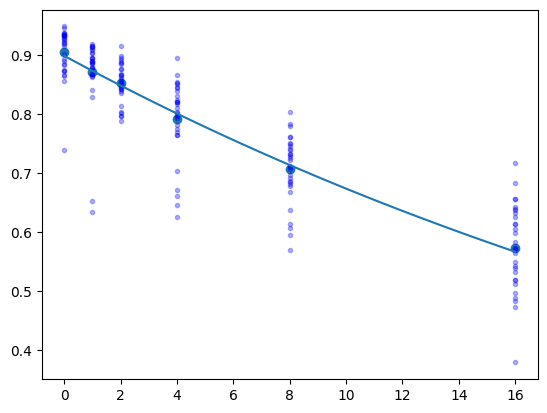

('I', 'X') 2
[0.91855411 0.96961524] 0.0010104910183696323


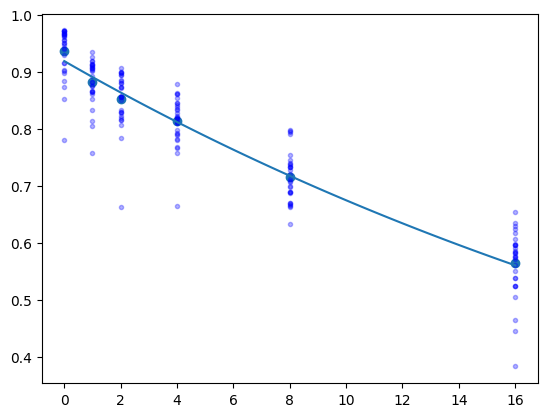

('I', 'Y') 2
[0.92028484 0.97684023] 0.0008005632070529274


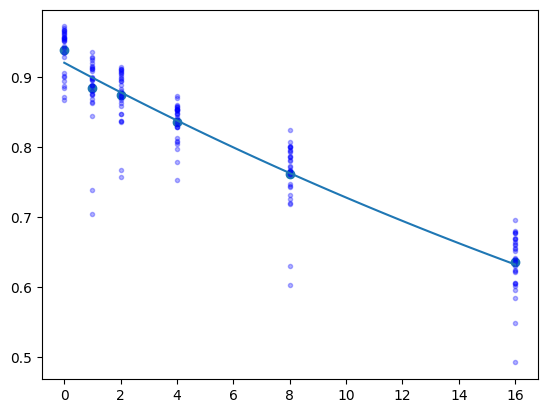

('Z', 'X') 2
[0.89437241 0.96646519] 0.0011723293884435962


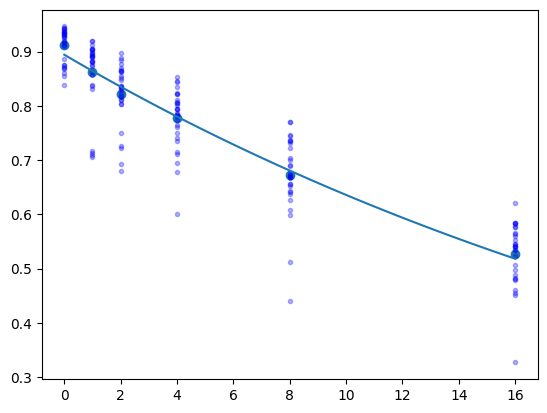

('Z', 'Y') 2
[0.90898782 0.9718556 ] 0.001050096947904847


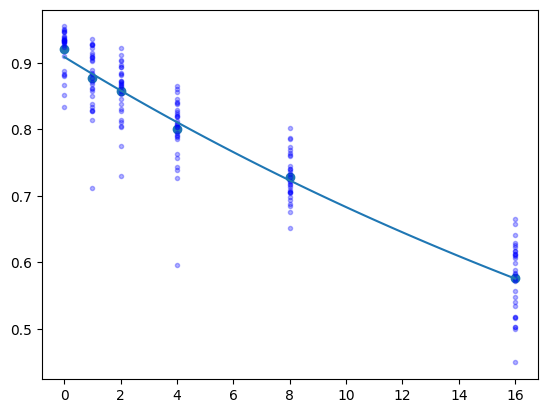

In [129]:
eigs = {}
eigs_std = {}
for (p,j), energy_lists in circuit_alt_energies_by_pauli.items():
    print(p, j)
    means = [np.mean(l) for l in energy_lists]
    res = curve_fit(decay_form, both_depths, means, p0=[1,0.99])[0]
    eigs[(p,True,j)] = res[1]
    
    std = bootstrap_error(energy_lists, both_depths, bootstrap_samples=100, n_shots=5000)
    eigs_std[(p,True,j)] = std
    
    print(res, std)
    xs = np.linspace(0,16, 100)
    f = [decay_form(x, *res) for x in xs]
    plt.scatter(both_depths, means)
    plt.plot(xs, f)
    for d, elist in zip(both_depths, energy_lists):
        plt.scatter([d for _ in elist], elist, alpha=0.3, color='blue', marker='.')
    plt.show()

In [132]:
vs = []
v_errs = []
for init_p in mcm_cphase_required_paulis:
    v = [1]+list(eigs[(init_p, True, j)] for j in range(3))
    v_err = [0]+list(eigs_std[(init_p, True, j)] for j in range(3))
    vs.append(v)
    v_errs.append(v_err)

In [45]:
eigs_std

{(('I', 'X'), True, 0): 0.0011997998868503996,
 (('I', 'Y'), True, 0): 0.0012670459963796813,
 (('Z', 'X'), True, 0): 0.0011275783796724928,
 (('Z', 'Y'), True, 0): 0.0011227176365149305,
 (('I', 'X'), True, 1): 0.000986734505706618,
 (('I', 'Y'), True, 1): 0.0012459086663878006,
 (('Z', 'X'), True, 1): 0.0008354299107346478,
 (('Z', 'Y'), True, 1): 0.0013096838521049897,
 (('I', 'X'), True, 2): 0.001040282004550147,
 (('I', 'Y'), True, 2): 0.0007742950987837163,
 (('Z', 'X'), True, 2): 0.0012842551162122095,
 (('Z', 'Y'), True, 2): 0.001027083979423387}

In [114]:
eigs_cz_len_2 = [eigs_cz[(('Z', 'X'), False)], eigs_cz[(('Z', 'Y'), False)], eigs_cz[(('Z', 'X'), False)], eigs_cz[(('Z', 'Y'), False)]]

In [164]:
eigs_cz_len_2_err = [eigs_cz_std[(('Z', 'X'), False)], eigs_cz_std[(('Z', 'Y'), False)], eigs_cz_std[(('Z', 'X'), False)], eigs_cz_std[(('Z', 'Y'), False)]]

In [126]:
depths

[0, 2, 4, 8, 16]

In [131]:
eigs

{(('I', 'X'), True, 0): 0.9709687511786633,
 (('I', 'Y'), True, 0): 0.9733035126153483,
 (('Z', 'X'), True, 0): 0.9671344107114347,
 (('Z', 'Y'), True, 0): 0.9726690880306663,
 (('I', 'X'), True, 1): 0.977452523429998,
 (('I', 'Y'), True, 1): 0.9759250005701647,
 (('Z', 'X'), True, 1): 0.9744100425405561,
 (('Z', 'Y'), True, 1): 0.971578591332236,
 (('I', 'X'), True, 2): 0.9696152397781096,
 (('I', 'Y'), True, 2): 0.9768402254879879,
 (('Z', 'X'), True, 2): 0.966465189264898,
 (('Z', 'Y'), True, 2): 0.9718556039494176}

In [134]:
vs

[[1, 0.9709687511786633, 0.977452523429998, 0.9696152397781096],
 [1, 0.9733035126153483, 0.9759250005701647, 0.9768402254879879],
 [1, 0.9671344107114347, 0.9744100425405561, 0.966465189264898],
 [1, 0.9726690880306663, 0.971578591332236, 0.9718556039494176]]

In [124]:
eigs_mcm

{(('I', 'I'), False): 1.0,
 (('I', 'X'), False): 0.9888826414915559,
 (('I', 'Y'), False): 0.9886132254240406,
 (('I', 'Z'), False): 0.9827735361069254,
 (('Z', 'I'), False): 0.981597039066984,
 (('Z', 'X'), False): 0.9700927011375767,
 (('Z', 'Y'), False): 0.96909671428848,
 (('Z', 'Z'), False): 0.9664162143705707,
 (('I', 'I'), True): 0.988798826967226,
 (('I', 'X'), True): 0.9780093112837466,
 (('I', 'Y'), True): 0.9770021656092929,
 (('I', 'Z'), True): 0.9728169528305034,
 (('Z', 'I'), True): 0.9895240978800937,
 (('Z', 'X'), True): 0.978303092933921,
 (('Z', 'Y'), True): 0.9779390444677022,
 (('Z', 'Z'), True): 0.9732277484169052}

In [135]:
eigs_cz

{(('X', 'Y'), False): 0.9531756588675867,
 (('Y', 'Y'), False): 0.927824020639863,
 (('Y', 'X'), False): 0.9235140913515891,
 (('Z', 'Z'), False): 0.9956812379643863,
 (('Z', 'X'), False): 0.9453764280845389,
 (('Z', 'Y'), False): 0.9367909571082499,
 (('Y', 'Z'), False): 0.9966508945266792,
 (('X', 'X'), False): 0.9220868453062715,
 (('X', 'Z'), False): 0.9959168437592602}

In [169]:
eigs_cz_std

{(('X', 'Y'), False): 0.009364065198726434,
 (('Y', 'Y'), False): 0.010522133975954695,
 (('Y', 'X'), False): 0.010866902032390737,
 (('Z', 'Z'), False): 0.0005092505679469148,
 (('Z', 'X'), False): 0.011016381947132862,
 (('Z', 'Y'), False): 0.0107915777206143,
 (('Y', 'Z'), False): 0.00045043383524488934,
 (('X', 'X'), False): 0.012710617968004595,
 (('X', 'Z'), False): 0.0005181692759639476}

In [177]:
v_errs

[[0, 0.0013057005461046386, 0.0007656068581323069, 0.0010104910183696323],
 [0, 0.001247221841681603, 0.0011092113483765975, 0.0008005632070529274],
 [0, 0.0011770565768950032, 0.0007188312780574372, 0.0011723293884435962],
 [0, 0.001209339352644602, 0.0013209636902399289, 0.001050096947904847]]

[0.924864683581927, 0.9245205207432834, 0.9200665725111321]
[0.9709687511786633, 0.977452523429998, 0.9696152397781096]
[0.9164654907715291, 0.916124453460426, 0.9117109539237797]
[0.9733035126153483, 0.9759250005701647, 0.9768402254879879]
[0.924864683581927, 0.9245205207432834, 0.9200665725111321]
[0.9671344107114347, 0.9744100425405561, 0.966465189264898]
[0.9164654907715291, 0.916124453460426, 0.9117109539237797]
[0.9726690880306663, 0.971578591332236, 0.9718556039494176]


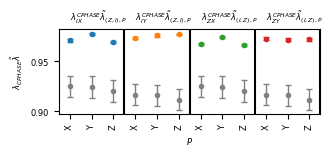

In [201]:
names = [r'''$\lambda_{IX}^{CPHASE}\tilde{\lambda}_{(Z,I),P}$''',
        r'''$\lambda_{IY}^{CPHASE}\tilde{\lambda}_{(Z,I),P}$''',
        r'''$\lambda_{ZX}^{CPHASE}\tilde{\lambda}_{(I,Z),P}$''',
        r'''$\lambda_{ZY}^{CPHASE}\tilde{\lambda}_{(I,Z),P}$''']
#try sorting by weight
plt.figure(figsize=(3.375,1.1))
xlabels = []
i = 0
largest_values = []
smallest_values = []
eigs_sorted = []
eig_sum_errs = []
for i,p in enumerate(mcm_cphase_required_paulis):
        unbiased_ests = [eigs_cz_len_2[i]*eigs_mcm[(('Z',p), True)] for p in ['X','Y','Z']]
        error = [eigs_cz_len_2[i]*eigs_mcm[(('Z',p), True)]*np.sqrt((eigs_mcm_std[(('Z',p), True)]/eigs_mcm[(('Z',p), True)])**2+(eigs_cz_len_2_err[i]/eigs_cz_len_2[i])**2) for p in ['X','Y','Z']]
        print(unbiased_ests)
        print(vs[i][1:])
        plt.text(3*i, 0.9905,names[i],fontsize=6)
        ps = vs[i][1:]
        plt.errorbar([3*i+j for j in range(3)], [p for p in ps], marker='.', yerr=v_errs[i][1:], elinewidth=1, capsize=2, linewidth=0)
        plt.errorbar([3*i+j for j in range(3)], unbiased_ests, marker='.', yerr=error, elinewidth=1, capsize=2, linewidth=0, color='gray')
        i += 1
        plt.axvline(3*i-0.5, color='black', linestyle='-')
        xlabels.extend(['X','Y','Z'])
        

plt.xticks(range(len(xlabels)), xlabels, rotation=90, fontsize=6)
#plt.axhline(0, color='gray',linestyle='--')
plt.yticks(fontsize=6)
plt.ylabel(r'''$\lambda_{CPHASE}\tilde{\lambda}$''', fontsize=6)
plt.xlabel(r'''$P$''',fontsize=6)
plt.xlim(-0.5,11.5)
#plt.ylim(0.95, 0.98)
plt.savefig('cz_mcm_plots/ibm_torino_05_26_relational.pdf')
plt.show()

#we could do (Z,I)P (I,Z)P' experiments and see how these vary from (Z,I)P (I,Z)P experiments

In [49]:
vs[0][1]-vs[2][1]+vs[1][1]-vs[3][1]

0.004468765051910628

In [50]:
vs[0][1]-vs[2][1]

0.0038343404672286363

In [53]:
np.sqrt(v_errs[0][1]**2+v_errs[2][1]**2)

0.0016464971214038232

In [54]:
np.sqrt(v_errs[0][1]**2+v_errs[2][1]**2+v_errs[1][1]**2+v_errs[3][1]**2)

0.0023615361989761086

In [51]:
vs

[[1, 0.9709687511786633, 0.977452523429998, 0.9696152397781096],
 [1, 0.9733035126153483, 0.9759250005701647, 0.9768402254879879],
 [1, 0.9671344107114347, 0.9744100425405561, 0.966465189264898],
 [1, 0.9726690880306663, 0.971578591332236, 0.9718556039494176]]

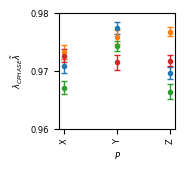

In [48]:
names = [r'''$\lambda_{IX}^{CPHASE}\tilde{\lambda}_{(Z,I),P}$''',
        r'''$\lambda_{IY}^{CPHASE}\tilde{\lambda}_{(Z,I),P}$''',
        r'''$\lambda_{ZX}^{CPHASE}\tilde{\lambda}_{(I,Z),P}$''',
        r'''$\lambda_{ZY}^{CPHASE}\tilde{\lambda}_{(I,Z),P}$''']
#try sorting by weight
plt.figure(figsize=(1.5,1.5))
xlabels = ['X','Y','Z']
i = 0
largest_values = []
smallest_values = []
eigs_sorted = []
eig_sum_errs = []
for i,p in enumerate(mcm_cphase_required_paulis):
        #plt.text(3*i, 0.9805,names[i],fontsize=6)
        ps = vs[i][1:]
        plt.errorbar([j for j in range(3)], [p for p in ps], marker='.', yerr=v_errs[i][1:], elinewidth=1, capsize=2, linewidth=0, label=names[i])
        i += 1
        

plt.xticks(range(len(xlabels)), xlabels, rotation=90, fontsize=6)
#plt.axhline(0, color='gray',linestyle='--')
plt.yticks(fontsize=6)
plt.ylabel(r'''$\lambda_{CPHASE}\tilde{\lambda}$''', fontsize=6)
plt.xlabel(r'''$P$''',fontsize=6)
#plt.xlim(-0.5,11.5)
plt.ylim(0.96, 0.98)
#plt.savefig('ibm_osaka_05_19_T10')
plt.show()

#we could do (Z,I)P (I,Z)P' experiments and see how these vary from (Z,I)P (I,Z)P experiments